# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Agus Satya
- Email: agoessatya3@gmail.com
- Id Dicoding: agoessatya

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana parameter kondisi cuaca mempengaruhi jumlah rental sepeda ?
- Pertanyaan 2 : Bagaimana parameter waktu mempengaruhi jumlah rental sepeda ?

## Menyiapkan Semua Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Data Wrangling

### Data Gathering

In [2]:
# Import file csv yang digunakan menggunakan pandas untuk dibaca sebagai dataframe
bike_day    = pd.read_csv('data/day.csv')
bike_hour   = pd.read_csv('data/hour.csv')
# Melihat preview data yang akan diolah
display(bike_day)
print(bike_day.shape)
display(bike_hour)
print(bike_hour.shape)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


(731, 16)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


(17379, 17)


### Accessing Data

#### Menilai Data bike_day

In [3]:
# Melihat keseluruhan format data yang terdapat di dalam bike_day
bike_day.info()
# Melihat jumlah nilai yang kosong pada bike_day
bike_day.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# Mengetahui jumlah data yang mengalami duplikasi
print("Jumlah duplikasi dataset Bike Day : ", bike_day.duplicated().sum())
# Mengetahui data statistik dasar dari bike_day
bike_day.describe()

Jumlah duplikasi dataset Bike Day :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data bike_hour

In [5]:
# Melihat keseluruhan format data yang terdapat di dalam bike_hour
bike_hour.info()
# Melihat jumlah nilai yang kosong pada bike_hour
bike_hour.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Mengetahui jumlah data yang mengalami duplikasi
print("Jumlah duplikasi dataset Bike Hour: ", bike_day.duplicated().sum())
# Mengetahui data statistik dasar dari bike_hour
bike_hour.describe()

Jumlah duplikasi dataset Bike Hour:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Cleanning Data

##### Memperbaiki tipe data

In [7]:
# Memperbaiki format column date menjadi format datetime untuk bike_day & bike_hour
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])
bike_day.info()
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Memperbaiki skala data

In [8]:
# Mengembalikan nilai sebelum dinormalisasi untuk parameter-parameter yang ada sesuai deskripsi data
bike_day['temp'] = bike_day['temp']*41
bike_hour['temp'] = bike_hour['temp']*41

bike_day['atemp'] = bike_day['atemp']*50
bike_hour['atemp'] = bike_hour['atemp']*50

bike_day['hum'] = bike_day['hum']*100
bike_hour['hum'] = bike_hour['hum']*100

bike_day['windspeed'] = bike_day['windspeed']*67
bike_hour['windspeed'] = bike_hour['windspeed']*67

display(bike_day)
display(bike_hour)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,10.66,13.635,56.0,8.9981,13,48,61


##### Menyeragamkan format desimal

In [9]:
# Format desimal diseragamkan untuk nilai-nilai dengan format float
float_column = ['temp', 'atemp', 'hum', 'windspeed']

for column in float_column:
  target_column     = bike_hour[column]
  bike_hour[column] = (target_column.round(decimals=2))
  target_column     = bike_day[column]
  bike_day[column]  = (target_column.round(decimals=2))

display(bike_day)
display(bike_hour)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,10.42,11.33,65.29,23.46,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,10.39,12.75,59.00,10.42,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,10.39,12.12,75.29,8.33,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,10.49,11.58,48.33,23.50,364,1432,1796


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.40,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.64,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.64,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.40,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.40,75.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,10.66,12.88,60.0,11.0,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,10.66,12.88,60.0,11.0,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,10.66,12.88,60.0,11.0,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,10.66,13.64,56.0,9.0,13,48,61


#### Mengubah data menjadi label

In [10]:
#Mengubah beberapa data dalam bentuk categorical menjadi bentuk label agar lebih mudah dalam visualisasi
season_label = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
weather_label = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}

bike_day['season'] = bike_day['season'].map(season_label)
bike_hour['season'] = bike_hour['season'].map(season_label)

bike_day['weathersit'] = bike_day['weathersit'].map(weather_label)
bike_hour['weathersit'] = bike_hour['weathersit'].map(weather_label)

display(bike_day.head())
display(bike_hour.head())

bike_day.info()
bike_hour.info()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear,9.31,11.46,43.70,12.52,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,9.84,14.40,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,9.02,13.64,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,9.02,13.64,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,9.84,14.40,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,9.84,14.40,75.0,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Exploratory Data Analysis (EDA)

In [11]:
display(bike_day.sample(5))
display(bike_hour.sample(5))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
20,21,2011-01-21,Spring,0,1,0,5,1,Clear,7.28,7.89,45.71,23.67,75,1468,1543
599,600,2012-08-22,Autumn,1,8,0,3,1,Clear,27.37,31.09,67.71,4.71,1094,6281,7375
265,266,2011-09-23,Winter,0,9,0,5,1,Cloudy,24.98,26.11,97.25,5.25,258,2137,2395
445,446,2012-03-21,Summer,1,3,0,3,1,Cloudy,21.80,25.66,82.12,6.00,1122,5108,6230
650,651,2012-10-12,Winter,1,10,0,5,1,Clear,17.94,21.65,53.92,15.75,1060,6222,7282


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2147,2148,2011-04-04,Summer,0,4,8,0,1,1,Cloudy,18.86,22.72,55.0,20.0,31,308,339
4789,4790,2011-07-23,Autumn,0,7,11,0,6,0,Clear,36.90,40.91,37.0,13.0,62,154,216
8892,8893,2012-01-11,Spring,1,1,9,0,3,1,Cloudy,8.20,10.60,86.0,9.0,7,218,225
7306,7307,2011-11-06,Winter,0,11,1,0,0,0,Clear,10.66,15.15,81.0,0.0,11,104,115
13164,13165,2012-07-07,Autumn,1,7,17,0,6,0,Clear,39.36,42.42,26.0,9.0,103,176,279


In [12]:
display(bike_day.describe(include='all'))
display(bike_hour.describe(include='all'))

C:\Users\Agus Satya\AppData\Local\Temp\ipykernel_23356\3677270332.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(bike_day.describe(include='all'))


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Autumn,NaN,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,20.310821,23.717784,62.789357,12.762654,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,NaN,7.505177,8.148006,14.242923,5.192157,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,13.820000,16.895000,52.000000,9.040000,315.500000,2497.000000,3152.000000


C:\Users\Agus Satya\AppData\Local\Temp\ipykernel_23356\3677270332.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(bike_hour.describe(include='all'))


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Autumn,NaN,NaN,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,20.376474,23.788484,62.722884,12.736233,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,NaN,7.894801,8.592587,19.292983,8.196891,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,13.940000,16.660000,48.000000,7.000000,4.000000,34.000000,40.000000


In [13]:
print(bike_day.instant.is_unique)
print(bike_hour.instant.is_unique)

True
True


In [14]:
print(bike_day.instant.duplicated)
print(bike_hour.instant.duplicated)

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>
<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>


In [15]:
display(bike_day.groupby(by=['season']).agg({
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]}))
display(bike_day.groupby(by=['weathersit']).agg({
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]}))
display(bike_day.groupby(by=['workingday']).agg({
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]}))

display(bike_day.groupby(by=['season', 'weathersit']).agg({
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]}))
display(bike_day.groupby(by=['weathersit', 'workingday']).agg({
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]}))   

registered                                           cnt              \
              sum   max  min         mean          std      sum   max   min   
season                                                                        
Autumn     835038  6917  889  4441.691489  1304.626949  1061129  8714  1115   
Spring     410726  5315  416  2269.204420  1200.269751   471348  7836   431   
Summer     715067  6456  674  3886.233696  1353.375628   918589  8362   795   
Winter     711831  6946   20  3999.050562  1444.782557   841613  8555    22   

                                  
               mean          std  
season                            
Autumn  5644.303191  1459.800381  
Spring  2604.132597  1399.942119  
Summer  4992.331522  1695.977235  
Winter  4728.162921  1699.615261

registered                                           cnt        \
                  sum   max  min         mean          std      sum   max   
weathersit                                                                  
Clear         1811606  6946  416  3912.755940  1533.347265  2257952  8714   
Cloudy         827082  6844  491  3348.510121  1463.566884   996858  8362   
Light Rain      33974  4324   20  1617.809524  1068.290954    37869  4639   

                                           
            min         mean          std  
weathersit                                 
Clear       431  4876.786177  1879.483989  
Cloudy      605  4035.862348  1809.109918  
Light Rain   22  1803.285714  1240.284449

registered                                           cnt        \
                  sum   max  min         mean          std      sum   max   
workingday                                                                  
0              683537  5966  451  2959.034632  1293.867686  1000269  8714   
1             1989125  6946   20  3978.250000  1568.692453  2292410  8362   

                                           
            min         mean          std  
workingday                                 
0           605  4330.168831  2052.141245  
1            22  4584.820000  1878.415583

registered                                           cnt  \
                         sum   max   min         mean          std     sum   
season weathersit                                                            
Autumn Clear          631498  6917  2298  4643.367647  1263.514545  799443   
       Cloudy         194272  6271   889  4047.333333  1223.118604  250679   
       Light Rain       9268  3195  1689  2317.000000   681.593721   11007   
Spring Clear          270474  5315   416  2436.702703  1261.619793  312036   
       Cloudy         136794  4681   491  2072.636364  1030.404650  155573   
       Light Rain       3458  1977   432   864.500000   744.182997    3739   
Summer Clear          480598  6456  1515  4253.079646  1217.335653  626986   
       Cloudy         231382  6110  1221  3402.676471  1300.096729  288096   
       Light Rain       3087  1506   674  1029.000000   429.207409    3507   
Winter Clear          429036  6946   935  4165.398058  1384.627481  519487   
       Cloudy         264634  6844  1009  4071.292308  1307.016423  302510   
       Light Rain      18161  4324    20  1816.100000  1235.704338   19616   

                                                         
                    max   min         mean          std  
season weathersit                                        
Autumn Clear       8714  3285  5878.257353  1356.647125  
       Cloudy      7582  1115  5222.479167  1431.160502  
       Light Rain  4459  1842  2751.750000  1199.339923  
Spring Clear       6312   431  2811.135135  1409.960622  
       Cloudy      7836   605  2357.166667  1313.332082  
       Light Rain  2169   441   934.750000   826.272100  
Summer Clear       8294  2028  5548.548673  1467.655078  
       Cloudy      8362  1471  4236.705882  1579.038070  
       Light Rain  1685   795  1169.000000   461.679543  
Winter Clear       8555  1495  5043.563107  1595.693909  
       Cloudy      7852  1096  4654.000000  1523.445365  
       Light Rain  4639    22  1961.600000  1329.287378

registered                                       \
                             sum   max  min         mean          std   
weathersit workingday                                                   
Clear      0              484145  5966  451  3103.493590  1287.534255   
           1             1327461  6946  416  4323.977199  1485.444429   
Cloudy     0              192069  5209  491  2743.842857  1236.136766   
           1              635013  6844  674  3587.644068  1480.535093   
Light Rain 0                7323  3195  570  1464.600000  1117.263756   
           1               26651  4324   20  1665.687500  1085.595242   

                           cnt                                       
                           sum   max  min         mean          std  
weathersit workingday                                                
Clear      0            715614  8714  754  4587.269231  2047.547484  
           1           1542338  8173  431  5023.902280  1773.485099  
Cloudy     0            275578  7852  605  3936.828571  1925.475601  
           1            721280  8362  683  4075.028249  1765.122364  
Light Rain 0              9077  4459  627  1815.400000  1595.990226  
           1             28792  4639   22  1799.500000  1171.221812

In [16]:
display(bike_hour.groupby(by=['weathersit']).agg({
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]}))
display(bike_hour.groupby(by=['hr']).agg({
    "registered": ["sum", "max", "min", "mean", "std", ],
    "cnt": ["sum", "max", "min", "mean", "std", ]}))

registered                                       cnt           \
                  sum  max min        mean         std      sum  max min   
weathersit                                                                 
Clear         1875428  886   0  164.323841  156.890453  2338173  977   1   
Cloudy         661471  822   0  145.570202  142.390431   795952  957   1   
Heavy Rain        215  158  22   71.666667   75.048873      223  164  23   
Light Rain     135548  791   0   95.523608  114.773469   158331  891   1   

                                    
                  mean         std  
weathersit                          
Clear       204.869272  189.487773  
Cloudy      175.165493  165.431589  
Heavy Rain   74.333333   77.925178  
Light Rain  111.579281  133.781045

registered                                      cnt                       \
          sum  max min        mean         std     sum  max min        mean   
hr                                                                            
0       31755  234   0   43.739669   34.019585   39130  283   2   53.898072   
1       19455  139   0   26.871547   27.344153   24164  168   1   33.375691   
2       12940  104   0   18.097902   21.303895   16352  132   1   22.869930   
3        6281   61   0    9.011478    9.743691    8174   79   1   11.727403   
4        3554   22   0    5.098996    3.134479    4428   28   1    6.352941   
5       13249   64   0   18.478382   12.674751   14261   66   1   19.889819   
6       52115  203   0   71.882759   53.535307   55132  213   1   76.044138   
7      146134  572   1  201.009629  157.120459  154171  596   1  212.064649   
8      245240  808   4  337.331499  229.698404  261001  839   5  359.011004   
9      136980  399   6  188.418157   84.633490  159438  426  14  219.309491   
10      92468  351   8  127.191197   66.281668  126257  539   8  173.668501   
11     108034  446   5  148.602476   79.090301  151320  663  10  208.143054   
12     134696  526   3  185.021978   89.240873  184414  776   3  253.315934   
13     132206  491   9  181.352538   87.424775  184919  760  11  253.661180   
14     120563  502  12  165.381344   84.055205  175652  750  12  240.949246   
15     128543  456   4  176.327846   84.488219  183149  750   7  251.233196   
16     173914  481   8  238.238356  103.765726  227748  783  11  311.983562   
17     282640  885  14  387.178082  211.676303  336860  976  15  461.452055   
18     265276  886  20  364.390110  203.599896  309772  977  23  425.510989   
19     191284  662  11  262.752747  138.708622  226789  743  11  311.523352   
20     138172  461   8  189.796703  100.293791  164550  567  11  226.030220   
21     104875  362   6  144.059066   73.149848  125445  584   6  172.314560   
22      79412  327   5  109.082418   55.252765   95612  502   9  131.335165   
23      52876  220   2   72.631868   40.446431   63941  256   2   87.831044   

                
           std  
hr              
0    42.307910  
1    33.538727  
2    26.578642  
3    13.239190  
4     4.143818  
5    13.200765  
6    55.084348  
7   161.441936  
8   235.189285  
9    93.703458  
10  102.205413  
11  127.495536  
12  145.081134  
13  148.107657  
14  147.271574  
15  144.632541  
16  148.682618  
17  232.656611  
18  224.639304  
19  161.050359  
20  119.670164  
21   89.788893  
22   69.937782  
23   50.846889

<AxesSubplot:>

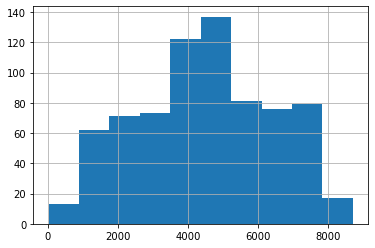

In [17]:
bike_day.cnt.hist()

<AxesSubplot:>

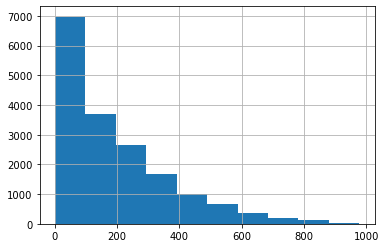

In [18]:
bike_hour.cnt.hist()

## Visualization & Explanatory Analysis

###  How do weather condition parameters influence the number of bicycle rentals?
Bagaimana pengaruh parameter waktu terhadap jumlah rental sepeda
Analisis sederhana digunakan untuk mengetahui karakteristik dari parameter <i>season, weathersit, atemp, dan hum</i>. Di mana masing-masingnya merupakan data yang dapat dianalisis sebagai parameter cuaca yang dapat mempengaruhi jumlah rental sepeda dalam data (musim, cuaca, temperatur rata-rata, kelembapan)

In [19]:
bike_day_byseason = bike_day.groupby('season')['cnt'].sum().reset_index()
bike_day_byweather = bike_day.groupby('weathersit')['cnt'].sum().reset_index()

bike_day_byseason = bike_day_byseason.rename(columns={'cnt': 'total count'})
bike_day_byweather = bike_day_byweather.rename(columns={'cnt': 'total count'})

display(bike_day_byseason.head())
display(bike_day_byweather.head())

,season,total count
0,Autumn,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


,weathersit,total count
0,Clear,2257952
1,Cloudy,996858
2,Light Rain,37869


In [20]:
bike_hour_byseason = bike_hour.groupby('season')['cnt'].sum().reset_index()
bike_hour_byweather = bike_hour.groupby('weathersit')['cnt'].sum().reset_index()

bike_hour_byseason = bike_hour_byseason.rename(columns={'cnt': 'total count'})
bike_hour_byweather = bike_hour_byweather.rename(columns={'cnt': 'total count'})

display(bike_hour_byseason.head())
display(bike_hour_byweather.head())

,season,total count
0,Autumn,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


,weathersit,total count
0,Clear,2338173
1,Cloudy,795952
2,Heavy Rain,223
3,Light Rain,158331


Text(0.5, 0.98, 'Daily Data Analysis of Rental Bike upon Weather Condition')

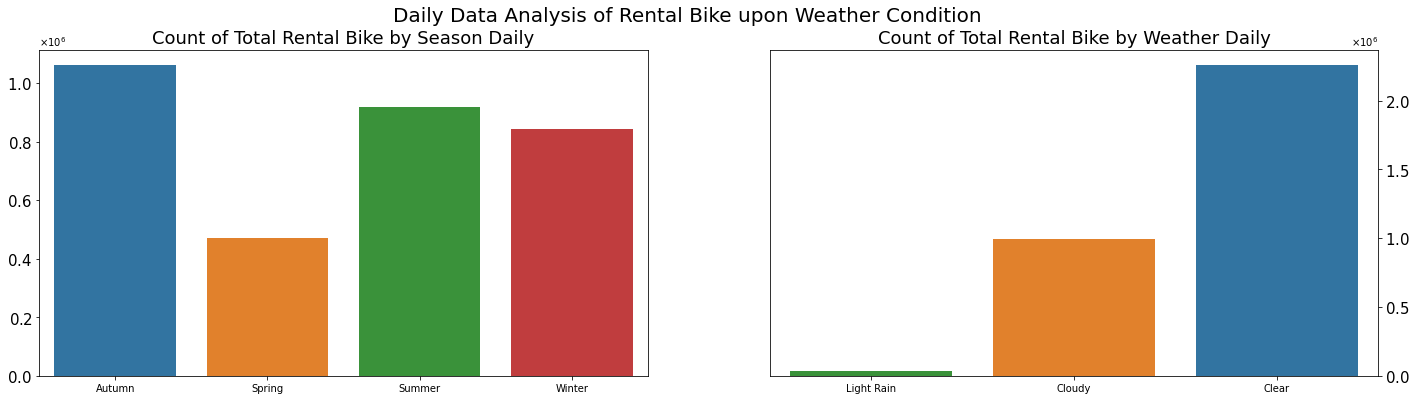

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="season", y="total count", data=bike_day_byseason, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Count of Total Rental Bike by Season Daily", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

sns.barplot(x="weathersit", y="total count", data=bike_day_byweather, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Count of Total Rental Bike by Weather Daily", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

plt.suptitle("Daily Data Analysis of Rental Bike upon Weather Condition", fontsize=20)


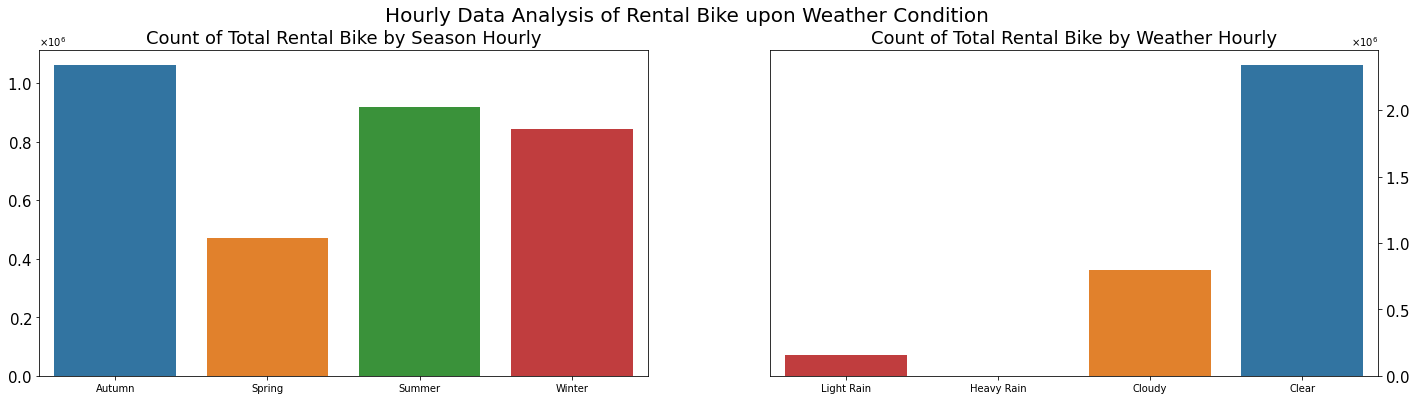

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="season", y="total count", data=bike_hour_byseason, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Count of Total Rental Bike by Season Hourly", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

sns.barplot(x="weathersit", y="total count", data=bike_hour_byweather, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Count of Total Rental Bike by Weather Hourly", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

plt.suptitle("Hourly Data Analysis of Rental Bike upon Weather Condition", fontsize=20)
plt.show()

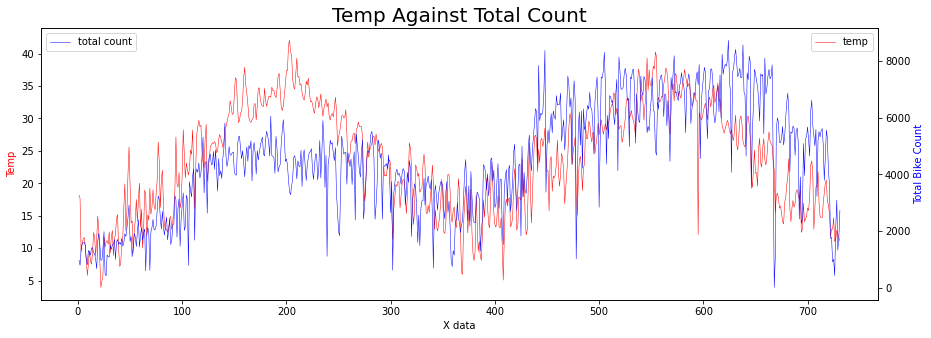

Corellation Score = 0.6310758645765864


In [68]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()

ax1.plot(bike_day["instant"],
         bike_day["atemp"],
         color='r',
         linewidth=0.5,
         label='temp')
ax2.plot(bike_day["instant"],
         bike_day["cnt"],
         color='b',
         linewidth=0.5,
         label='total count')

ax1.set_xlabel('X data')
ax1.set_ylabel('Temp', color='r')
ax2.set_ylabel('Total Bike Count', color='b')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Temp Against Total Count', loc="center", fontsize=20)
plt.show()

print('Corellation Score =', bike_day["atemp"].corr(bike_day["cnt"]))

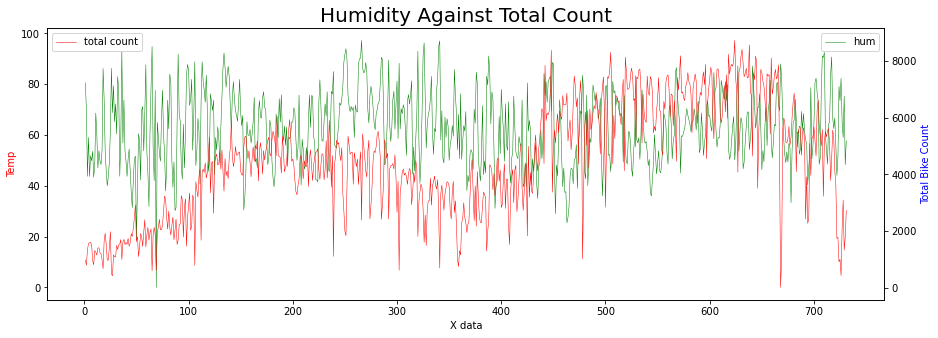

Corellation Score = -0.10065552255972555


In [70]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()

ax1.plot(bike_day["instant"],
         bike_day["hum"],
         color='g',
         linewidth=0.5,
         label='hum')
ax2.plot(bike_day["instant"],
         bike_day["cnt"],
         color='r',
         linewidth=0.5,
         label='total count')

ax1.set_xlabel('X data')
ax1.set_ylabel('Temp', color='r')
ax2.set_ylabel('Total Bike Count', color='b')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Humidity Against Total Count', loc="center", fontsize=20)
plt.show()

print('Corellation Score =', bike_day["hum"].corr(bike_day["cnt"]))

### How do time parameters influence the number of bicycle rentals?
Bagaimana pengaruh parameter waktu terhadap jumlah rental sepeda. Analisis sederhana digunakan untuk mendapatkan karakteristik dan hubungan antara parameter waktu yang disediakan dari kedua data. Diantaranya adalah <i> hr, holiday </i>. Di mana dari masing-masing parameter tersebut diharapkan dapat diketahui karakteristik rental terhadap jam penyewaan dan apakah hari tersebut akhir pekan atau hari kerja.

In [74]:
bike_hour_byhour = bike_hour.groupby('hr')['cnt'].sum().reset_index()
bike_hour_byholiday = bike_hour.groupby('holiday')['cnt'].sum().reset_index()

bike_hour_byhour = bike_hour_byhour.rename(columns={'cnt': 'total count'})
bike_hour_byholiday = bike_hour_byholiday.rename(columns={'cnt': 'total count'})

display(bike_hour_byhour)
display(bike_hour_byholiday)

,hr,total count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


,holiday,total count
0,0,3214244
1,1,78435


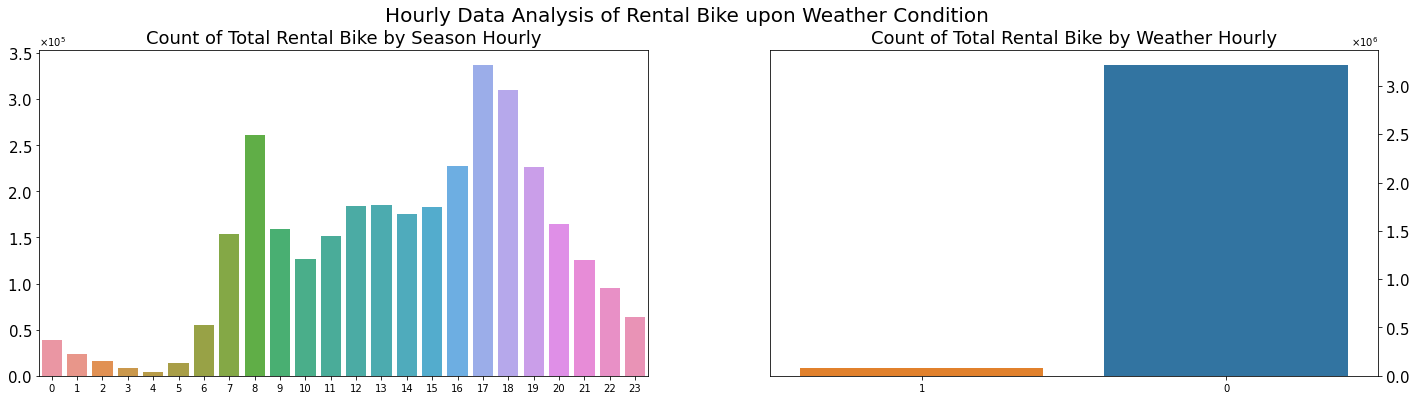

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="hr", y="total count", data=bike_hour_byhour, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Count of Total Rental Bike by Season Hourly", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

sns.barplot(x="holiday", y="total count", data=bike_hour_byholiday, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Count of Total Rental Bike by Weather Hourly", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

plt.suptitle("Hourly Data Analysis of Rental Bike upon Weather Condition", fontsize=20)
plt.show()

## Conclusion
- Pertanyaan 1 : Bagaimana parameter kondisi cuaca mempengaruhi jumlah rental sepeda ?<br>
Diketahui bahwa parameter cuaca berpengaruh terhadap jumlah penyewaan sepeda. <br> Dapat diketahui dari tabel dan grafik yang diperoleh bahwa cuaca cerah merupakan favorit untuk orang menggunakan sepeda dan enggan untuk menyewa ketika hujan atau salju turun. Kemudian orang lebih memilih untuk menggunakan sepeda di musim autumn atau gugur dan kurang menyukai bersepeda di musim spring atau semi. Hal ini kemudian dianalisis lebih lanjut dengan melihat kesesuaian time-series dari suhu udara rata-rata dan kelembapan terhadap jumlah penyewaan sepeda. Di mana pada musim gugur cuaca lebih sejuk, dan musim semi cuaca lebih lembab. Diketahui bahwa suhu memiliki korelasi 0.6 atau 60% terhadap jumlah penyewaan sepeda dan berkorelasi negatif terhadap kelembapan dengan nilai -0.1 atau 10%

- Pertanyaan 2 : Bagaimana parameter waktu mempengaruhi jumlah rental sepeda ?<br>
Diketahui bahwa parameter waktu mempengaruhi orang untuk menyewa sepeda. <br>Di mana pada hari kerja, jumlah penyewaan sepeda jauh lebih tinggi dibandingkan dengan akhir pekan atau libur. Ini dikarenakan mobilitas orang yang lebih tinggi pada saat hari kerja. Kemudian pola yang mendukung terlihat apabila dianalisis parameter jam terhadap penyewaan sepeda. Tingkat penyewaan tertinggi terjadi pada saat rush hour ketika orang berangkat kerja ataupun sekolah yaitu pukul 8 untuk berangkat dan 17 untuk kepulangan.